In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os
import pandas as pd
import seaborn as sns

rcParams["figure.figsize"] = 16 ,10
sns.set(style="whitegrid", palette="muted", font_scale = 1.5)

In [7]:
df = pd.read_csv("data\\jena_climate_2009_2016.csv")

In [8]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [9]:
TRAIN_SPLIT = 300000
tf.random.set_seed(13)

In [10]:
uni_data = df["T (degC)"]
uni_data.index = df["Date Time"]
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

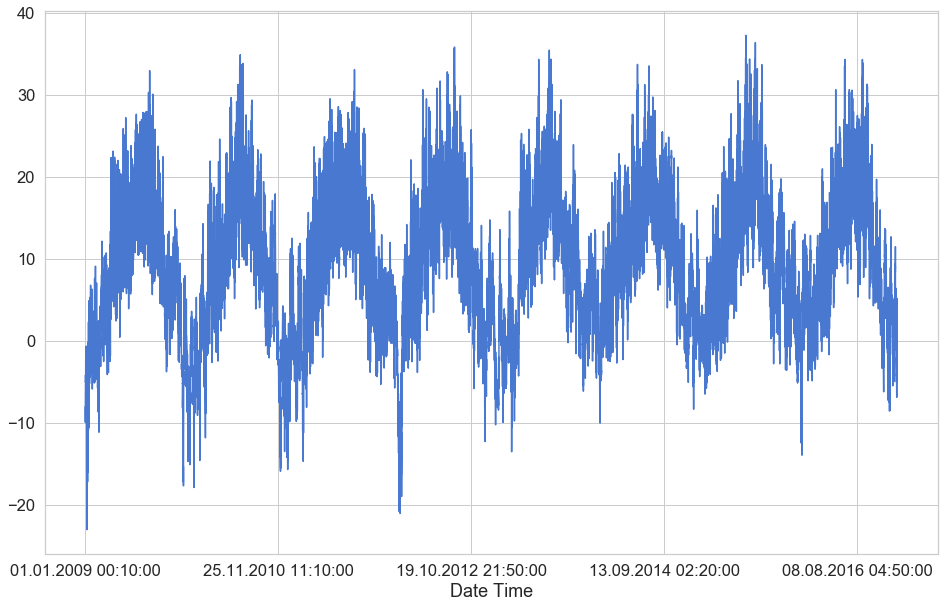

In [12]:
uni_data.plot()

In [13]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [15]:
len(uni_data)

420551

In [16]:
# standarizing
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [27]:
def univariate_data(dataset, start_id, end_id, his_size, target_size):
    data, labels = [], []
    
    start_id += his_size
    if end_id is None:
        end_id = len(dataset) - target_size
    
    for i in range(start_id, end_id):
        indices = range(i-his_size, i)
        data.append(np.reshape(dataset[indices], (his_size, 1)))
        labels.append(dataset[i + target_size])
    return np.array(data), np.array(labels)

In [28]:
train_x, train_y = univariate_data(uni_data, 0, TRAIN_SPLIT, 20, 0)

val_x, val_y = univariate_data(uni_data, TRAIN_SPLIT, None, 20, 0)

Exception: Data must be 1-dimensional